In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torchsummary import summary

In [56]:
trainingDataSet = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testingDataSet = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [57]:
batch_sizes = [64,1024]
train1 = torch.utils.data.DataLoader(trainingDataSet, batch_size=batch_sizes[0], shuffle=True)
test1 = torch.utils.data.DataLoader(testingDataSet, batch_size=batch_sizes[0], shuffle=True)
train2 = torch.utils.data.DataLoader(trainingDataSet, batch_size=batch_sizes[1], shuffle=True)
test2 = torch.utils.data.DataLoader(testingDataSet, batch_size=batch_sizes[1], shuffle=True)

In [58]:
# Calculating number of parameters in the class
def calcParams(model):
    val = sum(params.numel() for params in model.parameters() if params.requires_grad)
    return val

In [59]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,20)    
        self.fc2 = nn.Linear(20, 40)
        self.out = nn.Linear(40, 10)
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.out(val)
        return val

In [87]:
model1=Model1()
model1params=calcParams(model1)
print(model1params)
summary(model1,(28*28,))

16950
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 40]             840
            Linear-3                   [-1, 10]             410
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


In [61]:
lossFunc1 = nn.CrossEntropyLoss()
opt1 = torch.optim.Adam(model1.parameters(), lr=0.001)

In [62]:
trainCostList = []
trainAccList = []
testCostList = []
testAccList = []

In [63]:
epochs = 10
trainCorrectMod1 = []
testCorrectMod1 = []
trainLossesMod1=[]
testLossesMod1=[]
for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for batch, (XTrain, yTrain) in enumerate(train1):
       
        y_pred = model1(XTrain.view(-1,784))  
        trnLoss = lossFunc1(y_pred, yTrain)
        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr

        opt1.zero_grad()
        trnLoss.backward()
        opt1.step()

    trainLossesMod1.append(trnLoss)
    trainCorrectMod1.append(trainCorr)

    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test1):

            y_val = model1(XTest.view(-1,784)) 
            predicted = torch.max(y_val.data, 1)[1] 
            testCorr += (predicted == yTest).sum()
    
    testLoss = lossFunc1(y_val, yTest)
    testLossesMod1.append(testLoss)
    testCorrectMod1.append(testCorr)
    
        

In [64]:
for i in range(len(trainLossesMod1)):
     trainCostList.append(trainLossesMod1[i].detach().numpy())
for i in range(len(testLossesMod1)):
     testCostList.append(testLossesMod1[i].detach().numpy())
for i in range(len(trainCorrectMod1)):
     testAccList.append(trainCorrectMod1[i].detach().numpy()/600)
for i in range(len(testCorrectMod1)):
     testAccList.append(testCorrectMod1[i].detach().numpy()/100)

In [65]:
#Model 2 with batch size 1024

In [66]:
class Model2(nn.Module):
    def __init__(self, in_features=784, h2=20, h3=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(784,20)    
        self.fc2 = nn.Linear(20, 40)
        self.out = nn.Linear(40, 10)
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = self.out(val)
        return val

In [89]:
model2=Model2()
model2params=calcParams(model2)
print(model2params)
summary(model2,(28*28,))

16950
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 40]             840
            Linear-3                   [-1, 10]             410
Total params: 16,950
Trainable params: 16,950
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


In [68]:
lossFunc2 = nn.CrossEntropyLoss()
opt2 = torch.optim.Adam(model2.parameters(), lr=0.001)

In [54]:
epochs = 10
trainLossesMod2=[]
testLossesMod2=[]
trainCorrectMod2 = []
testCorrectMod2 = []
for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for batch, (XTrain, yTrain) in enumerate(train2):
       
        y_pred = model2(XTrain.view(-1,784))  
        loss = lossFunc2(y_pred, yTrain)
        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr
        opt2.zero_grad()
        loss.backward()
        opt2.step()
        
    trainLossesMod2.append(loss)
    trainCorrectMod2.append(trainCorr)
        
   
    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test2):
            y_val = model2(XTest.view(-1,784)) 
            predicted = torch.max(y_val.data, 1)[1] 
            testCorr += (predicted == yTest).sum()
    
    loss = lossFunc2(y_val, yTest)
    testLossesMod2.append(loss)
    testCorrectMod2.append(testCorr)
        

In [69]:
for i in range(len(trainLossesMod2)):
     trainCostList.append(trainLossesMod2[i].detach().numpy())
for i in range(len(testLossesMod2)):
     testCostList.append(testLossesMod2[i].detach().numpy())
for i in range(len(trainCorrectMod2)):
     trainAccList.append(trainCorrectMod2[i].detach().numpy()/600)
for i in range(len(testCorrectMod2)):
     testAccList.append(testCorrectMod2[i].detach().numpy()/100)

In [70]:
alpa=np.linspace(-1.0, 2.0, num=20)
thetaArr=[]
for i in range(len(alpa)):
    theta=(1-alpa[i])*model1params+alpa[i]*model2params
    thetaArr.append(theta)

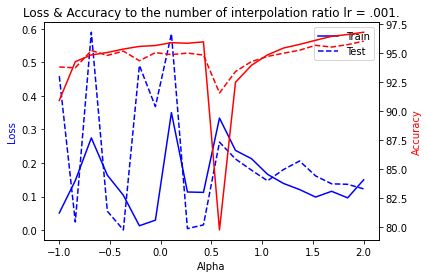

In [84]:
# Visulaize Loss and accuracy to the number of interpolation ratio with lr=0.001 for batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alpa, trainCostList, 'b', label='Train')
ax1.plot(alpa, testCostList, 'b--', label='Test')
ax2.plot(alpa, trainAccList, 'r', label='accuracy')
ax2.plot(alpa, testAccList, 'r--', label='accuracy')
ax1.set_title('Loss & Accuracy to the number of interpolation ratio lr = .001.')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')
ax1.legend()

In [73]:
class Model1(nn.Module):
    def __init__(self, in_features=784, h2=20, h3=40, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(784,20)    
        self.fc2 = nn.Linear(20, 40)
        self.out = nn.Linear(40, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [74]:
model1=Model1()
lossFunc1 = nn.CrossEntropyLoss()
opt1 = torch.optim.Adam(model1.parameters(), lr=0.01)

In [75]:
epochs = 10
trainCorrectMod1 = []
testCorrectMod1 = []
trainLossesMod1=[]
testLossesMod1=[]

for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for batch, (XTrain, yTrain) in enumerate(train1):
       
        y_pred = model1(XTrain.view(-1,784))  
        trnLoss = lossFunc1(y_pred, yTrain)

        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr
        opt1.zero_grad()
        trnLoss.backward()
        opt1.step()       

    trainLossesMod1.append(trnLoss)
    trainCorrectMod1.append(trainCorr)      
   
    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test1):

            y_val = model1(XTest.view(-1,784)) 
            predicted = torch.max(y_val.data, 1)[1] 
            testCorr += (predicted == yTest).sum()
 
    testLoss = lossFunc1(y_val, yTest)
    testLossesMod1.append(testLoss)
    testCorrectMod1.append(testCorr)
    
        

In [76]:
trainCostList = []
trainAccList = []
testCostList = []
testAccList = []

In [77]:
for i in range(len(trainLossesMod1)):
     trainCostList.append(trainLossesMod1[i].detach().numpy())
for i in range(len(testLossesMod1)):
     testCostList.append(testLossesMod1[i].detach().numpy())
for i in range(len(trainCorrectMod1)):
     trainAccList.append(trainCorrectMod1[i].detach().numpy()/600)
for i in range(len(testCorrectMod1)):
     testAccList.append(testCorrectMod1[i].detach().numpy()/100)

In [79]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,20)    
        self.fc2 = nn.Linear(20, 40)
        self.out = nn.Linear(40, 10)
                
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [80]:
model2=Model2()
lossFunc2 = nn.CrossEntropyLoss()
opt2= torch.optim.Adam(model2.parameters(), lr=0.01)

In [81]:
epochs = 10
trainCorrectMod2 = []
testCorrectMod2 = []
trainLossesMod2=[]
testLossesMod2=[]

for i in range(epochs):
    trainCorr = 0
    testCorr = 0

    for b, (XTrain, yTrain) in enumerate(train2):
       
        y_pred = model2(XTrain.view(-1,784))  
        trnLoss = lossFunc2(y_pred, yTrain)

        predicted = torch.max(y_pred.data, 1)[1]
        batchCorr = (predicted == yTrain).sum()
        trainCorr += batchCorr
        opt2.zero_grad()
        trnLoss.backward()
        opt2.step()

    trainLossesMod2.append(trnLoss)
    trainCorrectMod2.append(trainCorr)
        
    with torch.no_grad():
        for batch, (XTest, yTest) in enumerate(test2):

            y_val = model2(XTest.view(-1,784)) 

            predicted = torch.max(y_val.data, 1)[1] 
            testCorr += (predicted == yTest).sum()
    testLoss = lossFunc2(y_val, yTest)
    testLossesMod2.append(testLoss)
    testCorrectMod2.append(testCorr)
    
        

In [82]:
for i in range(len(trainLossesMod2)):
     trainCostList.append(trainLossesMod2[i].detach().numpy())
for i in range(len(testLossesMod2)):
     testCostList.append(testLossesMod2[i].detach().numpy())
for i in range(len(trainCorrectMod2)):
     trainAccList.append(trainCorrectMod2[i].detach().numpy()/600)
for i in range(len(testCorrectMod2)):
     testAccList.append(testCorrectMod2[i].detach().numpy()/100)

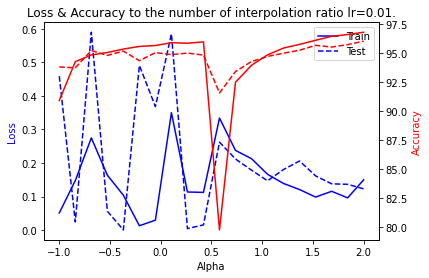

In [83]:
# Visulaize Loss and accuracy to the number of interpolation ratio with lr=0.001 for batch size of all models
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(alpa, trainCostList, 'b', label='Train')
ax1.plot(alpa, testCostList, 'b--', label='Test')
ax2.plot(alpa, trainAccList, 'r', label='accuracy')
ax2.plot(alpa, testAccList, 'r--', label='accuracy')
ax1.set_title('Loss & Accuracy to the number of interpolation ratio lr=0.01.')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Loss', color='b')
ax2.set_ylabel('Accuracy', color='r')
ax1.legend()